In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/jdariasl/DiplomadoEPM_2019/master/Modulo3/init.py
from init import init; init(force_download=False)

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import *
tf.__version__

'2.1.0'

# Sequential API

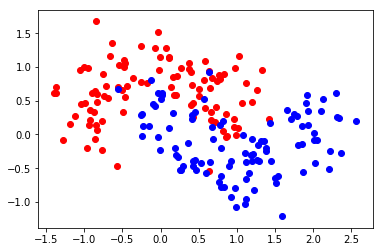

In [2]:
X, y = make_moons(200, noise=.3)

plt.scatter(X[:,0][y==0], X[:,1][y==0], color="red", label="class 0")
plt.scatter(X[:,0][y==1], X[:,1][y==1], color="blue", label="class 1")

In [3]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(2)))
model.add(tf.keras.layers.Dense(10, activation="tanh"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.fit(X,y, epochs=1000, batch_size=len(X))

Train on 200 samples
Epoch 1/1000
200/200 [==============================] - 0s 894us/sample - loss: 0.2421 - accuracy: 0.5450
Epoch 2/1000
200/200 [==============================] - 0s 7us/sample - loss: 0.1899 - accuracy: 0.8100
Epoch 3/1000
200/200 [==============================] - 0s 8us/sample - loss: 0.1639 - accuracy: 0.8300
Epoch 4/1000
200/200 [==============================] - 0s 8us/sample - loss: 0.1505 - accuracy: 0.8150
Epoch 5/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.1426 - accuracy: 0.8100
Epoch 6/1000
200/200 [==============================] - 0s 8us/sample - loss: 0.1374 - accuracy: 0.8100
Epoch 7/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.1337 - accuracy: 0.8150
Epoch 8/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.1310 - accuracy: 0.8150
Epoch 9/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1289 - accuracy: 0.8150
Epoch 10/1000
200/200 [================

Epoch 79/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1152 - accuracy: 0.8300
Epoch 80/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1152 - accuracy: 0.8300
Epoch 81/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.1152 - accuracy: 0.8300
Epoch 82/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.1152 - accuracy: 0.8300
Epoch 83/1000
200/200 [==============================] - 0s 8us/sample - loss: 0.1152 - accuracy: 0.8300
Epoch 84/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1152 - accuracy: 0.8300
Epoch 85/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.1152 - accuracy: 0.8300
Epoch 86/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1151 - accuracy: 0.8300
Epoch 87/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.1151 - accuracy: 0.8300
Epoch 88/1000
200/200 [=========================

Epoch 156/1000
200/200 [==============================] - 0s 14us/sample - loss: 0.1143 - accuracy: 0.8350
Epoch 157/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1143 - accuracy: 0.8350
Epoch 158/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.1143 - accuracy: 0.8350
Epoch 159/1000
200/200 [==============================] - 0s 14us/sample - loss: 0.1143 - accuracy: 0.8350
Epoch 160/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.1142 - accuracy: 0.8350
Epoch 161/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1142 - accuracy: 0.8350
Epoch 162/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.1142 - accuracy: 0.8350
Epoch 163/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.1142 - accuracy: 0.8350
Epoch 164/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.1142 - accuracy: 0.8350
Epoch 165/1000
200/200 [================

Epoch 233/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.1127 - accuracy: 0.8300
Epoch 234/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.1127 - accuracy: 0.8300
Epoch 235/1000
200/200 [==============================] - 0s 15us/sample - loss: 0.1126 - accuracy: 0.8300
Epoch 236/1000
200/200 [==============================] - 0s 14us/sample - loss: 0.1126 - accuracy: 0.8300
Epoch 237/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1125 - accuracy: 0.8300
Epoch 238/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.1125 - accuracy: 0.8300
Epoch 239/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1125 - accuracy: 0.8300
Epoch 240/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1124 - accuracy: 0.8300
Epoch 241/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.1124 - accuracy: 0.8300
Epoch 242/1000
200/200 [================

Epoch 310/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.1083 - accuracy: 0.8450
Epoch 311/1000
200/200 [==============================] - 0s 15us/sample - loss: 0.1082 - accuracy: 0.8450
Epoch 312/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.1081 - accuracy: 0.8450
Epoch 313/1000
200/200 [==============================] - 0s 17us/sample - loss: 0.1080 - accuracy: 0.8450
Epoch 314/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.1079 - accuracy: 0.8450
Epoch 315/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.1078 - accuracy: 0.8450
Epoch 316/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.1077 - accuracy: 0.8450
Epoch 317/1000
200/200 [==============================] - 0s 15us/sample - loss: 0.1076 - accuracy: 0.8450
Epoch 318/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1075 - accuracy: 0.8450
Epoch 319/1000
200/200 [==============

Epoch 387/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.0994 - accuracy: 0.8550
Epoch 388/1000
200/200 [==============================] - 0s 8us/sample - loss: 0.0993 - accuracy: 0.8550
Epoch 389/1000
200/200 [==============================] - 0s 14us/sample - loss: 0.0992 - accuracy: 0.8550
Epoch 390/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.0990 - accuracy: 0.8550
Epoch 391/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.0989 - accuracy: 0.8550
Epoch 392/1000
200/200 [==============================] - 0s 16us/sample - loss: 0.0988 - accuracy: 0.8550
Epoch 393/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.0986 - accuracy: 0.8550
Epoch 394/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.0985 - accuracy: 0.8550
Epoch 395/1000
200/200 [==============================] - 0s 15us/sample - loss: 0.0984 - accuracy: 0.8550
Epoch 396/1000
200/200 [===============

Epoch 464/1000
200/200 [==============================] - 0s 14us/sample - loss: 0.0897 - accuracy: 0.8750
Epoch 465/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.0895 - accuracy: 0.8750
Epoch 466/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.0894 - accuracy: 0.8750
Epoch 467/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.0893 - accuracy: 0.8750
Epoch 468/1000
200/200 [==============================] - 0s 8us/sample - loss: 0.0892 - accuracy: 0.8750
Epoch 469/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.0891 - accuracy: 0.8750
Epoch 470/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.0890 - accuracy: 0.8750
Epoch 471/1000
200/200 [==============================] - 0s 16us/sample - loss: 0.0889 - accuracy: 0.8750
Epoch 472/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.0888 - accuracy: 0.8750
Epoch 473/1000
200/200 [===============

Epoch 541/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.0822 - accuracy: 0.8700
Epoch 542/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.0821 - accuracy: 0.8700
Epoch 543/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.0820 - accuracy: 0.8700
Epoch 544/1000
200/200 [==============================] - 0s 16us/sample - loss: 0.0819 - accuracy: 0.8700
Epoch 545/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.0819 - accuracy: 0.8700
Epoch 546/1000
200/200 [==============================] - 0s 14us/sample - loss: 0.0818 - accuracy: 0.8650
Epoch 547/1000
200/200 [==============================] - 0s 15us/sample - loss: 0.0817 - accuracy: 0.8650
Epoch 548/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.0816 - accuracy: 0.8650
Epoch 549/1000
200/200 [==============================] - 0s 16us/sample - loss: 0.0815 - accuracy: 0.8650
Epoch 550/1000
200/200 [===============

Epoch 618/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.0768 - accuracy: 0.8950
Epoch 619/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.0768 - accuracy: 0.8950
Epoch 620/1000
200/200 [==============================] - 0s 8us/sample - loss: 0.0767 - accuracy: 0.9000
Epoch 621/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.0767 - accuracy: 0.9000
Epoch 622/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.0766 - accuracy: 0.9000
Epoch 623/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.0765 - accuracy: 0.9000
Epoch 624/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.0765 - accuracy: 0.9000
Epoch 625/1000
200/200 [==============================] - 0s 7us/sample - loss: 0.0764 - accuracy: 0.9000
Epoch 626/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.0764 - accuracy: 0.9000
Epoch 627/1000
200/200 [==================

Epoch 695/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.0727 - accuracy: 0.9100
Epoch 696/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.0726 - accuracy: 0.9100
Epoch 697/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.0726 - accuracy: 0.9100
Epoch 698/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.0725 - accuracy: 0.9100
Epoch 699/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.0725 - accuracy: 0.9100
Epoch 700/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.0724 - accuracy: 0.9100
Epoch 701/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.0724 - accuracy: 0.9100
Epoch 702/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.0723 - accuracy: 0.9100
Epoch 703/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.0723 - accuracy: 0.9100
Epoch 704/1000
200/200 [=================

Epoch 772/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.0692 - accuracy: 0.9150
Epoch 773/1000
200/200 [==============================] - 0s 8us/sample - loss: 0.0691 - accuracy: 0.9150
Epoch 774/1000
200/200 [==============================] - 0s 15us/sample - loss: 0.0691 - accuracy: 0.9150
Epoch 775/1000
200/200 [==============================] - 0s 8us/sample - loss: 0.0690 - accuracy: 0.9150
Epoch 776/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.0690 - accuracy: 0.9150
Epoch 777/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.0690 - accuracy: 0.9150
Epoch 778/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.0689 - accuracy: 0.9150
Epoch 779/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.0689 - accuracy: 0.9150
Epoch 780/1000
200/200 [==============================] - 0s 8us/sample - loss: 0.0688 - accuracy: 0.9150
Epoch 781/1000
200/200 [=================

Epoch 849/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.0661 - accuracy: 0.9250
Epoch 850/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.0661 - accuracy: 0.9250
Epoch 851/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.0661 - accuracy: 0.9250
Epoch 852/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.0660 - accuracy: 0.9250
Epoch 853/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.0660 - accuracy: 0.9250
Epoch 854/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.0660 - accuracy: 0.9250
Epoch 855/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.0659 - accuracy: 0.9250
Epoch 856/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.0659 - accuracy: 0.9250
Epoch 857/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.0658 - accuracy: 0.9250
Epoch 858/1000
200/200 [=============

Epoch 926/1000
200/200 [==============================] - 0s 14us/sample - loss: 0.0635 - accuracy: 0.9250
Epoch 927/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.0635 - accuracy: 0.9250
Epoch 928/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.0635 - accuracy: 0.9250
Epoch 929/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.0634 - accuracy: 0.9250
Epoch 930/1000
200/200 [==============================] - 0s 8us/sample - loss: 0.0634 - accuracy: 0.9250
Epoch 931/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.0634 - accuracy: 0.9250
Epoch 932/1000
200/200 [==============================] - 0s 8us/sample - loss: 0.0634 - accuracy: 0.9250
Epoch 933/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.0633 - accuracy: 0.9250
Epoch 934/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.0633 - accuracy: 0.9250
Epoch 935/1000
200/200 [===============

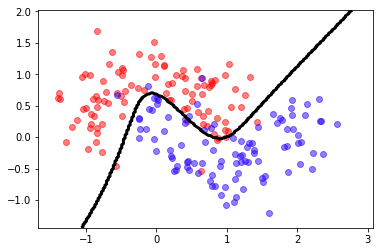

In [6]:
from local.lib import mlutils
predict = lambda X: (model.predict(X)[:,0]>.5).astype(int)

mlutils.plot_2Ddata_with_boundary(predict, X,y);


# Functional API

In [7]:
inputs  = tf.keras.layers.Input(shape=(2))
hidden  = tf.keras.layers.Dense(10, activation="tanh")(inputs)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(hidden)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

In [8]:
model.fit(X,y, epochs=1000, batch_size=len(X))

Train on 200 samples
Epoch 1/1000
200/200 [==============================] - 0s 789us/sample - loss: 0.3537 - accuracy: 0.3200
Epoch 2/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.2751 - accuracy: 0.3750
Epoch 3/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.2162 - accuracy: 0.7700
Epoch 4/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1829 - accuracy: 0.8250
Epoch 5/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.1643 - accuracy: 0.8200
Epoch 6/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.1529 - accuracy: 0.8100
Epoch 7/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.1453 - accuracy: 0.8100
Epoch 8/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.1400 - accuracy: 0.8100
Epoch 9/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.1360 - accuracy: 0.8100
Epoch 10/1000
200/200 [===========

Epoch 79/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1156 - accuracy: 0.8300
Epoch 80/1000
200/200 [==============================] - 0s 14us/sample - loss: 0.1156 - accuracy: 0.8300
Epoch 81/1000
200/200 [==============================] - 0s 18us/sample - loss: 0.1156 - accuracy: 0.8300
Epoch 82/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.1156 - accuracy: 0.8300
Epoch 83/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1156 - accuracy: 0.8300
Epoch 84/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1155 - accuracy: 0.8300
Epoch 85/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1155 - accuracy: 0.8300
Epoch 86/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.1155 - accuracy: 0.8300
Epoch 87/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.1155 - accuracy: 0.8300
Epoch 88/1000
200/200 [=======================

Epoch 156/1000
200/200 [==============================] - 0s 15us/sample - loss: 0.1152 - accuracy: 0.8300
Epoch 157/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.1152 - accuracy: 0.8300
Epoch 158/1000
200/200 [==============================] - 0s 16us/sample - loss: 0.1152 - accuracy: 0.8300
Epoch 159/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.1152 - accuracy: 0.8300
Epoch 160/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.1152 - accuracy: 0.8300
Epoch 161/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1152 - accuracy: 0.8300
Epoch 162/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.1152 - accuracy: 0.8300
Epoch 163/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.1152 - accuracy: 0.8300
Epoch 164/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.1152 - accuracy: 0.8300
Epoch 165/1000
200/200 [===============

Epoch 233/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.1149 - accuracy: 0.8350
Epoch 234/1000
200/200 [==============================] - 0s 14us/sample - loss: 0.1149 - accuracy: 0.8350
Epoch 235/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.1149 - accuracy: 0.8350
Epoch 236/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1149 - accuracy: 0.8350
Epoch 237/1000
200/200 [==============================] - 0s 15us/sample - loss: 0.1149 - accuracy: 0.8350
Epoch 238/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.1149 - accuracy: 0.8350
Epoch 239/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.1149 - accuracy: 0.8350
Epoch 240/1000
200/200 [==============================] - 0s 16us/sample - loss: 0.1149 - accuracy: 0.8350
Epoch 241/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.1149 - accuracy: 0.8350
Epoch 242/1000
200/200 [=============

Epoch 310/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.1146 - accuracy: 0.8350
Epoch 311/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.1146 - accuracy: 0.8350
Epoch 312/1000
200/200 [==============================] - 0s 15us/sample - loss: 0.1146 - accuracy: 0.8350
Epoch 313/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.1146 - accuracy: 0.8350
Epoch 314/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.1146 - accuracy: 0.8350
Epoch 315/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1146 - accuracy: 0.8350
Epoch 316/1000
200/200 [==============================] - 0s 8us/sample - loss: 0.1145 - accuracy: 0.8350
Epoch 317/1000
200/200 [==============================] - 0s 14us/sample - loss: 0.1145 - accuracy: 0.8350
Epoch 318/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.1145 - accuracy: 0.8350
Epoch 319/1000
200/200 [==============

Epoch 387/1000
200/200 [==============================] - 0s 15us/sample - loss: 0.1140 - accuracy: 0.8350
Epoch 388/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1140 - accuracy: 0.8350
Epoch 389/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.1140 - accuracy: 0.8350
Epoch 390/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1140 - accuracy: 0.8350
Epoch 391/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.1140 - accuracy: 0.8350
Epoch 392/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.1139 - accuracy: 0.8350
Epoch 393/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.1139 - accuracy: 0.8350
Epoch 394/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1139 - accuracy: 0.8350
Epoch 395/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1139 - accuracy: 0.8350
Epoch 396/1000
200/200 [==============

Epoch 464/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.1126 - accuracy: 0.8350
Epoch 465/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.1126 - accuracy: 0.8350
Epoch 466/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.1126 - accuracy: 0.8350
Epoch 467/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.1125 - accuracy: 0.8350
Epoch 468/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.1125 - accuracy: 0.8350
Epoch 469/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.1125 - accuracy: 0.8350
Epoch 470/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.1124 - accuracy: 0.8350
Epoch 471/1000
200/200 [==============================] - 0s 14us/sample - loss: 0.1124 - accuracy: 0.8350
Epoch 472/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1124 - accuracy: 0.8350
Epoch 473/1000
200/200 [=================

Epoch 541/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.1088 - accuracy: 0.8450
Epoch 542/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.1087 - accuracy: 0.8450
Epoch 543/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.1087 - accuracy: 0.8450
Epoch 544/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1086 - accuracy: 0.8450
Epoch 545/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.1085 - accuracy: 0.8450
Epoch 546/1000
200/200 [==============================] - 0s 15us/sample - loss: 0.1084 - accuracy: 0.8450
Epoch 547/1000
200/200 [==============================] - 0s 8us/sample - loss: 0.1083 - accuracy: 0.8450
Epoch 548/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.1083 - accuracy: 0.8450
Epoch 549/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.1082 - accuracy: 0.8450
Epoch 550/1000
200/200 [===============

Epoch 618/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.1002 - accuracy: 0.8550
Epoch 619/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.1000 - accuracy: 0.8550
Epoch 620/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.0999 - accuracy: 0.8550
Epoch 621/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.0997 - accuracy: 0.8600
Epoch 622/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.0996 - accuracy: 0.8600
Epoch 623/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.0994 - accuracy: 0.8600
Epoch 624/1000
200/200 [==============================] - 0s 15us/sample - loss: 0.0993 - accuracy: 0.8600
Epoch 625/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.0991 - accuracy: 0.8600
Epoch 626/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.0990 - accuracy: 0.8600
Epoch 627/1000
200/200 [==============

Epoch 695/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.0884 - accuracy: 0.8750
Epoch 696/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.0883 - accuracy: 0.8750
Epoch 697/1000
200/200 [==============================] - 0s 8us/sample - loss: 0.0882 - accuracy: 0.8750
Epoch 698/1000
200/200 [==============================] - 0s 8us/sample - loss: 0.0880 - accuracy: 0.8750
Epoch 699/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.0879 - accuracy: 0.8750
Epoch 700/1000
200/200 [==============================] - 0s 14us/sample - loss: 0.0877 - accuracy: 0.8750
Epoch 701/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.0876 - accuracy: 0.8750
Epoch 702/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.0874 - accuracy: 0.8750
Epoch 703/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.0873 - accuracy: 0.8750
Epoch 704/1000
200/200 [===================

Epoch 772/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.0788 - accuracy: 0.8900
Epoch 773/1000
200/200 [==============================] - 0s 15us/sample - loss: 0.0787 - accuracy: 0.8900
Epoch 774/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.0786 - accuracy: 0.8900
Epoch 775/1000
200/200 [==============================] - 0s 8us/sample - loss: 0.0785 - accuracy: 0.8900
Epoch 776/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.0784 - accuracy: 0.8900
Epoch 777/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.0783 - accuracy: 0.8900
Epoch 778/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.0782 - accuracy: 0.8900
Epoch 779/1000
200/200 [==============================] - 0s 8us/sample - loss: 0.0781 - accuracy: 0.8900
Epoch 780/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.0780 - accuracy: 0.8900
Epoch 781/1000
200/200 [=================

Epoch 849/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.0722 - accuracy: 0.8950
Epoch 850/1000
200/200 [==============================] - 0s 15us/sample - loss: 0.0721 - accuracy: 0.8950
Epoch 851/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.0721 - accuracy: 0.8950
Epoch 852/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.0720 - accuracy: 0.8950
Epoch 853/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.0719 - accuracy: 0.8950
Epoch 854/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.0718 - accuracy: 0.8900
Epoch 855/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.0718 - accuracy: 0.8900
Epoch 856/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.0717 - accuracy: 0.8900
Epoch 857/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.0716 - accuracy: 0.8950
Epoch 858/1000
200/200 [===============

Epoch 926/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.0676 - accuracy: 0.9200
Epoch 927/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.0675 - accuracy: 0.9200
Epoch 928/1000
200/200 [==============================] - 0s 8us/sample - loss: 0.0675 - accuracy: 0.9200
Epoch 929/1000
200/200 [==============================] - 0s 15us/sample - loss: 0.0674 - accuracy: 0.9200
Epoch 930/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.0673 - accuracy: 0.9200
Epoch 931/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.0673 - accuracy: 0.9200
Epoch 932/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.0672 - accuracy: 0.9200
Epoch 933/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.0672 - accuracy: 0.9200
Epoch 934/1000
200/200 [==============================] - 0s 15us/sample - loss: 0.0671 - accuracy: 0.9200
Epoch 935/1000
200/200 [===============

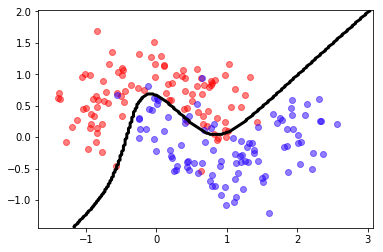

In [9]:
predict = lambda X: (model.predict(X)[:,0]>.5).astype(int)

mlutils.plot_2Ddata_with_boundary(predict, X,y);

# Dropout

In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(2)))
model.add(tf.keras.layers.Dense(10, activation="tanh"))
model.add(tf.keras.layers.Dropout(.1))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

In [11]:
model.fit(X,y, epochs=1000, batch_size=len(X))

Train on 200 samples
Epoch 1/1000
200/200 [==============================] - 0s 903us/sample - loss: 0.2120 - accuracy: 0.6550
Epoch 2/1000
200/200 [==============================] - 0s 8us/sample - loss: 0.1909 - accuracy: 0.7250
Epoch 3/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.1708 - accuracy: 0.7550
Epoch 4/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1578 - accuracy: 0.7950
Epoch 5/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.1500 - accuracy: 0.7950
Epoch 6/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.1475 - accuracy: 0.7900
Epoch 7/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.1451 - accuracy: 0.8000
Epoch 8/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.1401 - accuracy: 0.8050
Epoch 9/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.1335 - accuracy: 0.8150
Epoch 10/1000
200/200 [============

Epoch 79/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1210 - accuracy: 0.8250
Epoch 80/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.1214 - accuracy: 0.8300
Epoch 81/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1197 - accuracy: 0.8300
Epoch 82/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1161 - accuracy: 0.8400
Epoch 83/1000
200/200 [==============================] - 0s 7us/sample - loss: 0.1160 - accuracy: 0.8250
Epoch 84/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.1169 - accuracy: 0.8350
Epoch 85/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.1206 - accuracy: 0.8250
Epoch 86/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1167 - accuracy: 0.8200
Epoch 87/1000
200/200 [==============================] - 0s 8us/sample - loss: 0.1164 - accuracy: 0.8300
Epoch 88/1000
200/200 [==========================

Epoch 156/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.1156 - accuracy: 0.8250
Epoch 157/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1162 - accuracy: 0.8400
Epoch 158/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.1187 - accuracy: 0.8300
Epoch 159/1000
200/200 [==============================] - 0s 24us/sample - loss: 0.1187 - accuracy: 0.8350
Epoch 160/1000
200/200 [==============================] - 0s 15us/sample - loss: 0.1172 - accuracy: 0.8350
Epoch 161/1000
200/200 [==============================] - 0s 15us/sample - loss: 0.1143 - accuracy: 0.8300
Epoch 162/1000
200/200 [==============================] - 0s 15us/sample - loss: 0.1157 - accuracy: 0.8400
Epoch 163/1000
200/200 [==============================] - 0s 14us/sample - loss: 0.1146 - accuracy: 0.8350
Epoch 164/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.1160 - accuracy: 0.8350
Epoch 165/1000
200/200 [=============

Epoch 233/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.1165 - accuracy: 0.8300
Epoch 234/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.1183 - accuracy: 0.8450
Epoch 235/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.1156 - accuracy: 0.8400
Epoch 236/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.1146 - accuracy: 0.8300
Epoch 237/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.1153 - accuracy: 0.8350
Epoch 238/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.1124 - accuracy: 0.8450
Epoch 239/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.1192 - accuracy: 0.8300
Epoch 240/1000
200/200 [==============================] - 0s 14us/sample - loss: 0.1167 - accuracy: 0.8300
Epoch 241/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1160 - accuracy: 0.8350
Epoch 242/1000
200/200 [=================

Epoch 310/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1164 - accuracy: 0.8350
Epoch 311/1000
200/200 [==============================] - 0s 14us/sample - loss: 0.1169 - accuracy: 0.8400
Epoch 312/1000
200/200 [==============================] - 0s 16us/sample - loss: 0.1169 - accuracy: 0.8400
Epoch 313/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.1168 - accuracy: 0.8350
Epoch 314/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1151 - accuracy: 0.8450
Epoch 315/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.1135 - accuracy: 0.8300
Epoch 316/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.1169 - accuracy: 0.8350
Epoch 317/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.1144 - accuracy: 0.8300
Epoch 318/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.1168 - accuracy: 0.8350
Epoch 319/1000
200/200 [================

Epoch 387/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.1135 - accuracy: 0.8450
Epoch 388/1000
200/200 [==============================] - 0s 14us/sample - loss: 0.1135 - accuracy: 0.8350
Epoch 389/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.1169 - accuracy: 0.8450
Epoch 390/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.1146 - accuracy: 0.8350
Epoch 391/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1139 - accuracy: 0.8450
Epoch 392/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.1148 - accuracy: 0.8450
Epoch 393/1000
200/200 [==============================] - 0s 14us/sample - loss: 0.1119 - accuracy: 0.8450
Epoch 394/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.1124 - accuracy: 0.8300
Epoch 395/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1123 - accuracy: 0.8500
Epoch 396/1000
200/200 [===============

Epoch 464/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.1037 - accuracy: 0.8600
Epoch 465/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1107 - accuracy: 0.8450
Epoch 466/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.1142 - accuracy: 0.8400
Epoch 467/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1094 - accuracy: 0.8400
Epoch 468/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.1093 - accuracy: 0.8500
Epoch 469/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1104 - accuracy: 0.8450
Epoch 470/1000
200/200 [==============================] - 0s 15us/sample - loss: 0.1093 - accuracy: 0.8450
Epoch 471/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.1096 - accuracy: 0.8450
Epoch 472/1000
200/200 [==============================] - 0s 14us/sample - loss: 0.1088 - accuracy: 0.8500
Epoch 473/1000
200/200 [=============

Epoch 541/1000
200/200 [==============================] - 0s 14us/sample - loss: 0.0978 - accuracy: 0.8550
Epoch 542/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.1037 - accuracy: 0.8550
Epoch 543/1000
200/200 [==============================] - 0s 15us/sample - loss: 0.1006 - accuracy: 0.8600
Epoch 544/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.1042 - accuracy: 0.8550
Epoch 545/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.1131 - accuracy: 0.8550
Epoch 546/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.1050 - accuracy: 0.8500
Epoch 547/1000
200/200 [==============================] - 0s 16us/sample - loss: 0.1063 - accuracy: 0.8350
Epoch 548/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.0992 - accuracy: 0.8600
Epoch 549/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.1004 - accuracy: 0.8650
Epoch 550/1000
200/200 [===============

Epoch 618/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.0961 - accuracy: 0.8600
Epoch 619/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1099 - accuracy: 0.8500
Epoch 620/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.0984 - accuracy: 0.8700
Epoch 621/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.0995 - accuracy: 0.8650
Epoch 622/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.0972 - accuracy: 0.8600
Epoch 623/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.0972 - accuracy: 0.8600
Epoch 624/1000
200/200 [==============================] - 0s 17us/sample - loss: 0.1005 - accuracy: 0.8650
Epoch 625/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.0944 - accuracy: 0.8650
Epoch 626/1000
200/200 [==============================] - 0s 14us/sample - loss: 0.1049 - accuracy: 0.8600
Epoch 627/1000
200/200 [================

Epoch 695/1000
200/200 [==============================] - 0s 14us/sample - loss: 0.0911 - accuracy: 0.8800
Epoch 696/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.0934 - accuracy: 0.8700
Epoch 697/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.0964 - accuracy: 0.8600
Epoch 698/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.0933 - accuracy: 0.8650
Epoch 699/1000
200/200 [==============================] - 0s 16us/sample - loss: 0.1069 - accuracy: 0.8550
Epoch 700/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.0950 - accuracy: 0.8750
Epoch 701/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1026 - accuracy: 0.8650
Epoch 702/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.0942 - accuracy: 0.8800
Epoch 703/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.0960 - accuracy: 0.8600
Epoch 704/1000
200/200 [==============

Epoch 772/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.1049 - accuracy: 0.8600
Epoch 773/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.1054 - accuracy: 0.8500
Epoch 774/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.0997 - accuracy: 0.8650
Epoch 775/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.0906 - accuracy: 0.8550
Epoch 776/1000
200/200 [==============================] - 0s 16us/sample - loss: 0.0925 - accuracy: 0.8700
Epoch 777/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.0816 - accuracy: 0.8700
Epoch 778/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.1039 - accuracy: 0.8600
Epoch 779/1000
200/200 [==============================] - 0s 20us/sample - loss: 0.0926 - accuracy: 0.8850
Epoch 780/1000
200/200 [==============================] - 0s 8us/sample - loss: 0.0884 - accuracy: 0.8750
Epoch 781/1000
200/200 [===============

Epoch 849/1000
200/200 [==============================] - 0s 14us/sample - loss: 0.0850 - accuracy: 0.8950
Epoch 850/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.0859 - accuracy: 0.8900
Epoch 851/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.0849 - accuracy: 0.8850
Epoch 852/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.0969 - accuracy: 0.8750
Epoch 853/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.0803 - accuracy: 0.9000
Epoch 854/1000
200/200 [==============================] - 0s 17us/sample - loss: 0.0973 - accuracy: 0.8650
Epoch 855/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.0924 - accuracy: 0.8750
Epoch 856/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.0850 - accuracy: 0.8850
Epoch 857/1000
200/200 [==============================] - 0s 14us/sample - loss: 0.0878 - accuracy: 0.8700
Epoch 858/1000
200/200 [==============

Epoch 926/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.0988 - accuracy: 0.8600
Epoch 927/1000
200/200 [==============================] - 0s 11us/sample - loss: 0.0879 - accuracy: 0.8950
Epoch 928/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.0895 - accuracy: 0.8900
Epoch 929/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.0771 - accuracy: 0.8950
Epoch 930/1000
200/200 [==============================] - 0s 12us/sample - loss: 0.0827 - accuracy: 0.8950
Epoch 931/1000
200/200 [==============================] - 0s 13us/sample - loss: 0.0913 - accuracy: 0.8850
Epoch 932/1000
200/200 [==============================] - 0s 10us/sample - loss: 0.0923 - accuracy: 0.8800
Epoch 933/1000
200/200 [==============================] - 0s 9us/sample - loss: 0.0865 - accuracy: 0.8850
Epoch 934/1000
200/200 [==============================] - 0s 14us/sample - loss: 0.1000 - accuracy: 0.8550
Epoch 935/1000
200/200 [===============

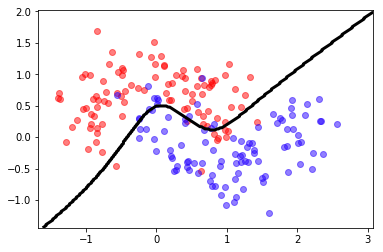

In [12]:
predict = lambda X: (model.predict(X)[:,0]>.5).astype(int)

mlutils.plot_2Ddata_with_boundary(predict, X,y);